In [1]:
import requests
import json 
import datetime
from IPython.display import Image  
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#API url
BASE_URL = 'https://arc.msn.com/v3/Delivery/Placement?pid=209567&fmt=json&rafb=0&ua=WindowsShellClient%2F0&cdm=1&disphorzres=9999&dispvertres=9999&lo=80217&pl=en-US&lc=en-US&ctry=serbia&time='
#OpenStreetMaps API for coordinates
BASE_URL_OSM = 'https://nominatim.openstreetmap.org/search.php?q={mesto}&format=json&limit=1' ##{mesto} = search query

#Create list of times i 1 hour intervals
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(hours=x) for x in range(10)] 
date_list[0].strftime("%Y-%m-%dT%H:%M:%S") ##Check if good

'2021-10-06T11:44:27'

In [3]:
#Storing all in array
lista_svega = [] 

#Main loop
for vreme in date_list:
    URL = BASE_URL + vreme.strftime("%Y-%m-%dT%H:%M:%S") #Create URL with time
    a = requests.get(URL) #Get JSON
    for i in range(len(a.json())): #Iterate (~3 locations per url)
        txt_json = a.json()['batchrsp']['items'][i]['item'] #One of json items is text which needs to be converted to dict
        json_obj = json.loads(txt_json) #Conversion to json 
        place = json_obj['ad']['title_text']['tx']
        url = json_obj['ad']['image_fullscreen_001_landscape']['u']
        #Coordinates
        try:
            mesto = place.replace(' ','%20') #Name of the place (convert space to %20)
            b = requests.get(BASE_URL_OSM.format(mesto=mesto)) #Search api with that name
            #print(b.json())
            #Get lat and lon
            lat = b.json()[0]['lat'] 
            lon = b.json()[0]['lon']
            #print(lat,lon)
        except:
            #If fails, no coordinates
            lat = None
            lon = None
        #Add to array
        lista_svega.append([lat,lon,place,url])
        print(lat,lon,place,url)

63.3991408 -19.030469351550092 Reynisdrangar, Iceland https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RWEtem?ver=77f0
-15.9323662 -50.1392928 Goiás, Brazil https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RE4Iy6n?ver=597c
51.4582235 7.0158171 Essen, Germany https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RWwFaV?ver=cd73
47.8035704 13.047335 Salzkammergut, Austria https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RE4wKEs?ver=c54d
6.2525941 -75.16688346311615 Guatapé, Colombia https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RE4t527?ver=34df
65.3333333 -164.25 Seward Peninsula, Alaska https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RE4Ihk0?ver=1da8
29.33341 -103.19400041973404 Big Bend National Park, Texas https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RWEBan?ver=f1be
40.89937665 9.517745484

In [4]:
import pandas as pd
#Excel file
df = pd.DataFrame(lista_svega,columns=['Lat','Lon','Location','URL'])
df[['Lat','Lon']] = df[['Lat','Lon']].apply(pd.to_numeric)
df.to_excel('slike.xlsx', index=False)

In [5]:
df.head()

,Lat,Lon,Location,URL
0,63.399141,-19.030469,"Reynisdrangar, Iceland",https://img-prod-cms-rt-microsoft-com.akamaize...
1,-15.932366,-50.139293,"Goiás, Brazil",https://img-prod-cms-rt-microsoft-com.akamaize...
2,51.458224,7.015817,"Essen, Germany",https://img-prod-cms-rt-microsoft-com.akamaize...
3,47.803570,13.047335,"Salzkammergut, Austria",https://img-prod-cms-rt-microsoft-com.akamaize...
4,6.252594,-75.166883,"Guatapé, Colombia",https://img-prod-cms-rt-microsoft-com.akamaize...


#### Load data for game

In [6]:
df = pd.read_excel('slikee.xlsx')

In [7]:
df.rename(columns = {'Lat':0,'Lon':1,'Location':2,'URL':3}, inplace = True)
df

,0,1,2,3
0,5.528110,-87.059762,"Cocos Island, Costa Rica",https://img-prod-cms-rt-microsoft-com.akamaize...
1,46.691947,7.677466,"Spiez, Switzerland",https://img-prod-cms-rt-microsoft-com.akamaize...
2,29.564740,106.547877,"Chongqing, China",https://img-prod-cms-rt-microsoft-com.akamaize...
3,-12.062107,-77.036526,"Lima, Peru",https://img-prod-cms-rt-microsoft-com.akamaize...
4,37.650107,24.026282,"Cape Sounion, Greece",https://img-prod-cms-rt-microsoft-com.akamaize...
...,...,...,...,...
995,47.616860,10.742763,"Forggensee, Germany",https://img-prod-cms-rt-microsoft-com.akamaize...
996,69.074994,-52.285942,"Disko Bay, Greenland",https://img-prod-cms-rt-microsoft-com.akamaize...
997,-26.617259,144.263855,"Channel Country, Australia",https://img-prod-cms-rt-microsoft-com.akamaize...
998,39.926479,9.701441,"Arbatax, Sardinia",https://img-prod-cms-rt-microsoft-com.akamaize...


##### 0 = lat
##### 1 = lon
##### 2 = location name
##### 3  = pic url

### Disable scrollable output window for game

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
} 

<IPython.core.display.Javascript object>

### Game 

In [9]:
df_game = df.dropna()
df_game[4] = df[2].apply(lambda x: x.split(',')[-1], 1)
#new column containing only string after last comma in location name (Country, most of the times)
df_game[4] = df_game[4].apply(lambda x: x if x[0]!=' ' else x[1:], 1) 
df_game[0] = df_game[0].apply(pd.to_numeric) #for calculations
df_game[1] = df_game[1].apply(pd.to_numeric)
df_game.head()

,0,1,2,3,4
0,5.528110,-87.059762,"Cocos Island, Costa Rica",https://img-prod-cms-rt-microsoft-com.akamaize...,Costa Rica
1,46.691947,7.677466,"Spiez, Switzerland",https://img-prod-cms-rt-microsoft-com.akamaize...,Switzerland
2,29.564740,106.547877,"Chongqing, China",https://img-prod-cms-rt-microsoft-com.akamaize...,China
3,-12.062107,-77.036526,"Lima, Peru",https://img-prod-cms-rt-microsoft-com.akamaize...,Peru
4,37.650107,24.026282,"Cape Sounion, Greece",https://img-prod-cms-rt-microsoft-com.akamaize...,Greece


In [10]:
def get_question():
    i = random.randint(0,len(df_game)-1) #Get random row 
    odgovor = df_game[4][i] #Right answer
    slika = df_game[3][i] #URL
    lat,lon = df_game[0][i],df_game[1][i] #Coordinates
    df_game[6] = (((df_game[0] - lat) ** 2) + (df_game[1] - lon) ** 2) ** .5 #Distance from coordinates
    arr = list(dict.fromkeys(df_game.sort_values(by=[6])[4].values.tolist())) #Order by distance asc
    arr = arr[2:5] #Get 3 answers, from second place (1st is probably the right answer)
    arr.append(odgovor) #Add right answer to answers
    random.shuffle(arr) #Shuffle
    pun = df_game[2][i] #Get full location name also
    return slika,arr, odgovor, pun

In [11]:
import time
def game_start(br_igri):
    score = 0 
    for i in range(br_igri): #Iterate N
        try: #Sometimes it crashes, so i've just bypassed it (problem with some of data)
            url, odgovori, tacno, pun = get_question() #Call question fun
            print('1: ', odgovori[0], '\n2: ', odgovori[1],'\n3: ', odgovori[2],'\n4: ', odgovori[3]) #Show answers
            display(Image(requests.get(url).content,width=1920, height=1080)) #Show picture
            odg = int(input()) #Get choice
            #Check if answer is good
            if(odgovori[odg-1]==tacno):
                print('Good job')
                score+=1 #Score++
            else: 
                print('Nope its, ' + tacno)
            print('Full location name: ' + pun)
            print('\n\n')
            time.sleep(3)
        except:
            br_igri-=1 #So the ending score wouldn't say 6/10 if you had only 9 games => 6/9
            pass
    print('Your score: ' + str(score)+'/'+str(br_igri)) #Score

1:  Peru 
2:  Colombia 
3:  Ecuador 
4:  Chile


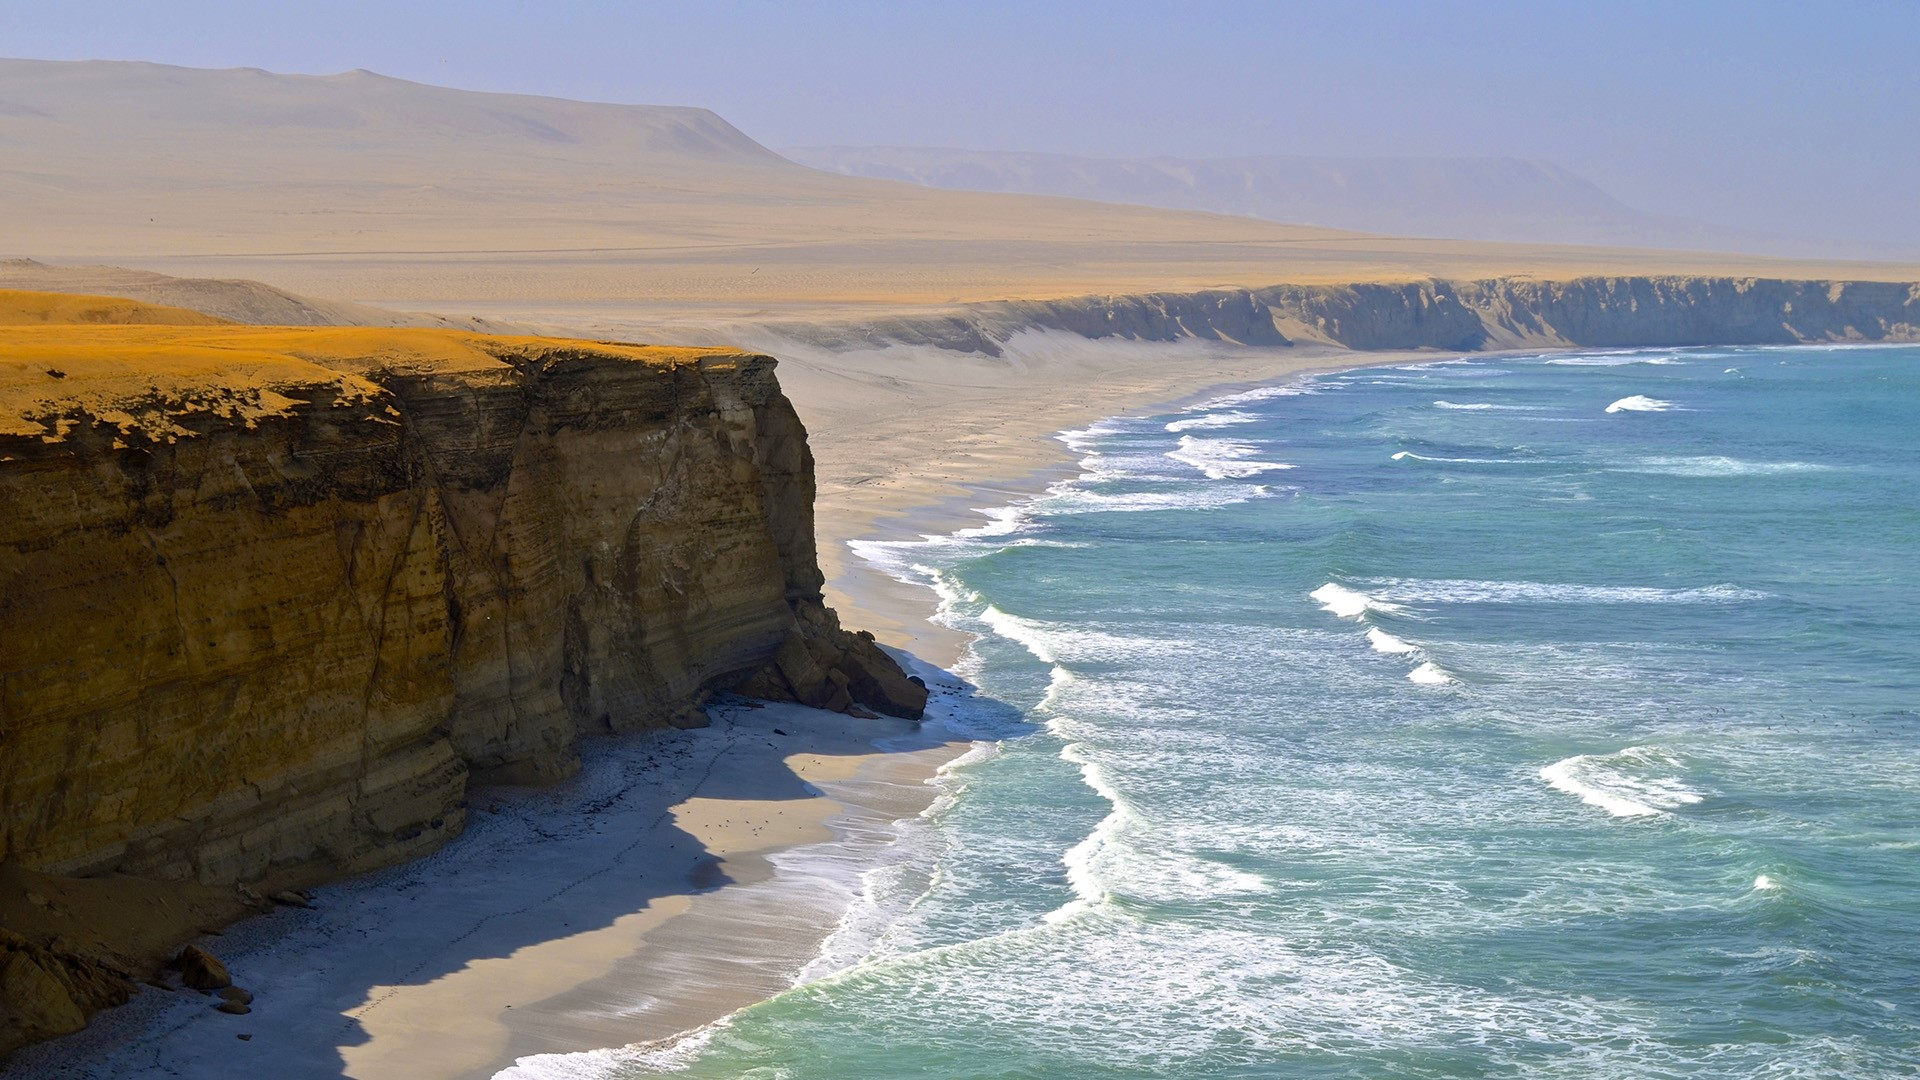

1
Good job
Full location name: Ica, Peru



1:  Madagascar 
2:  Uganda 
3:  Kenya 
4:  Malawi


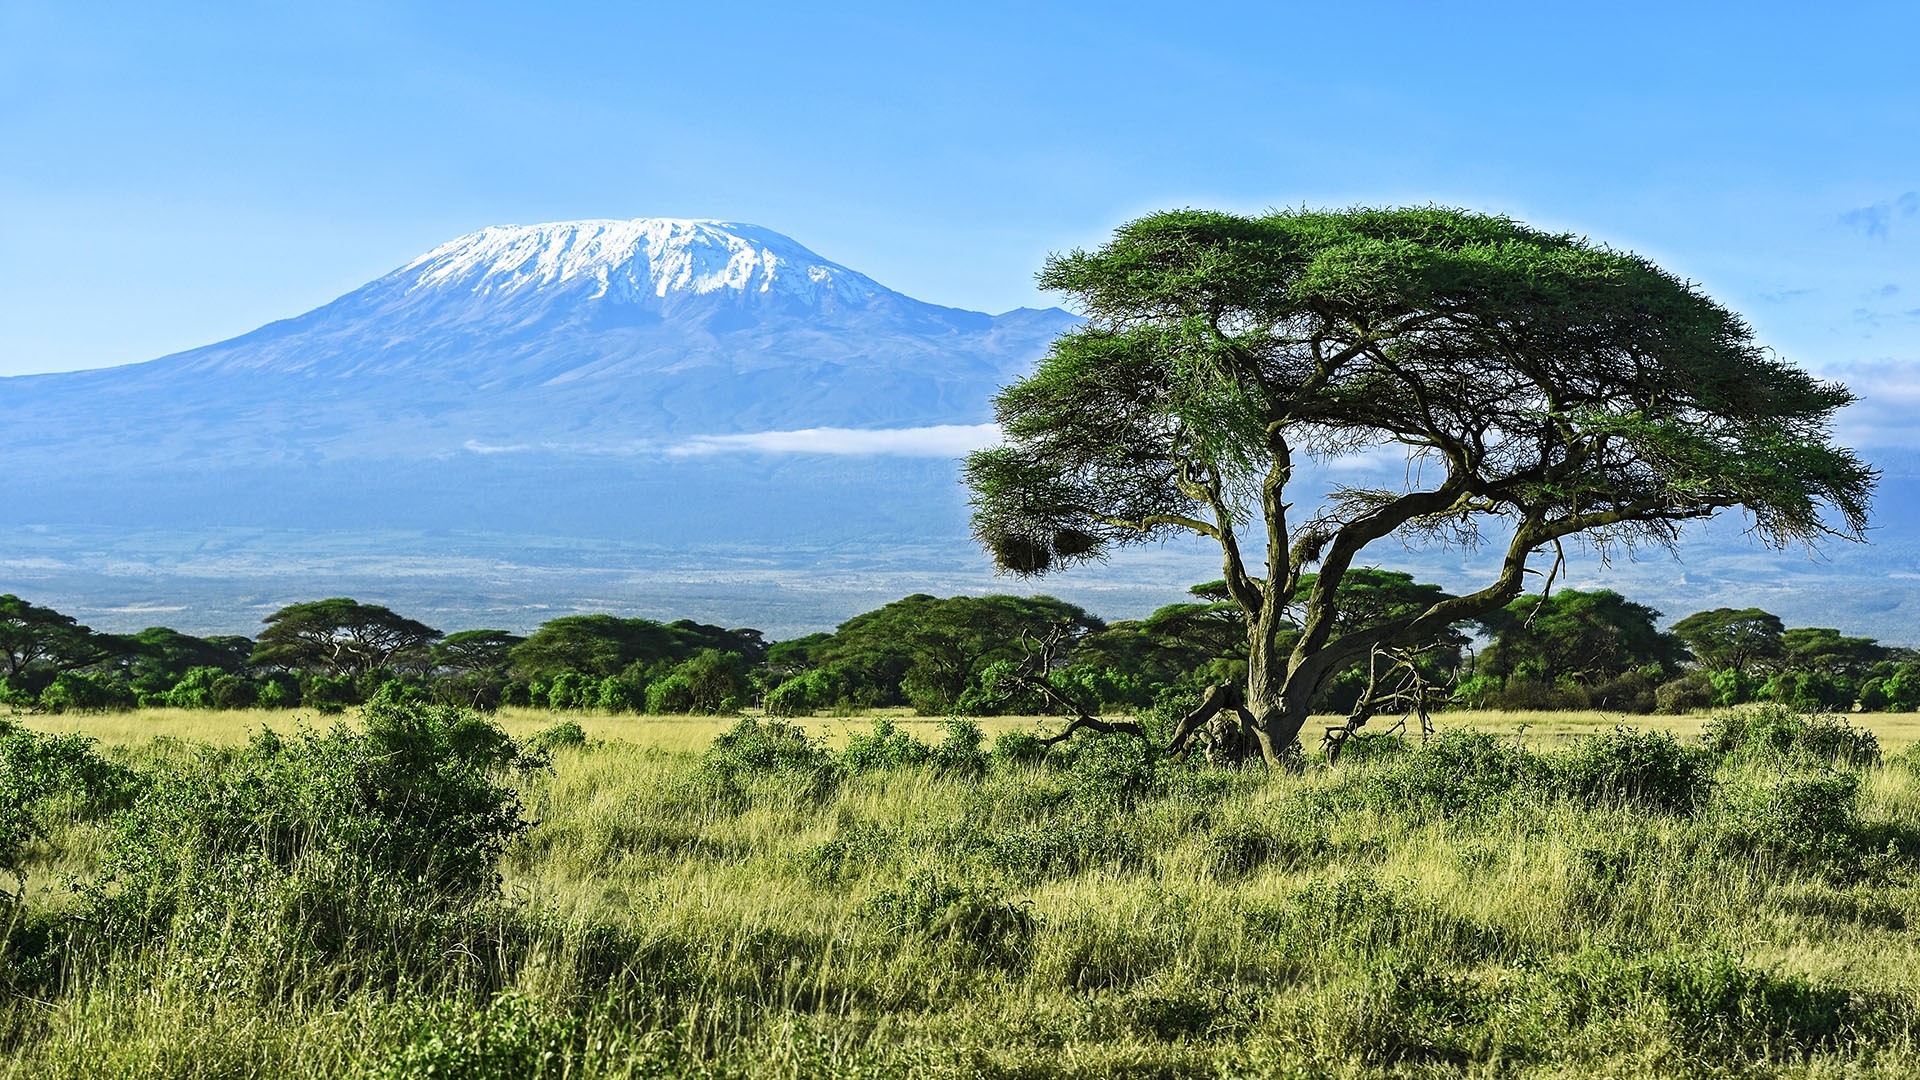

3
Good job
Full location name: Amboseli National Park, Kenya



1:  Minnesota 
2:  Michigan 
3:  Japanese macaques 
4:  Canada


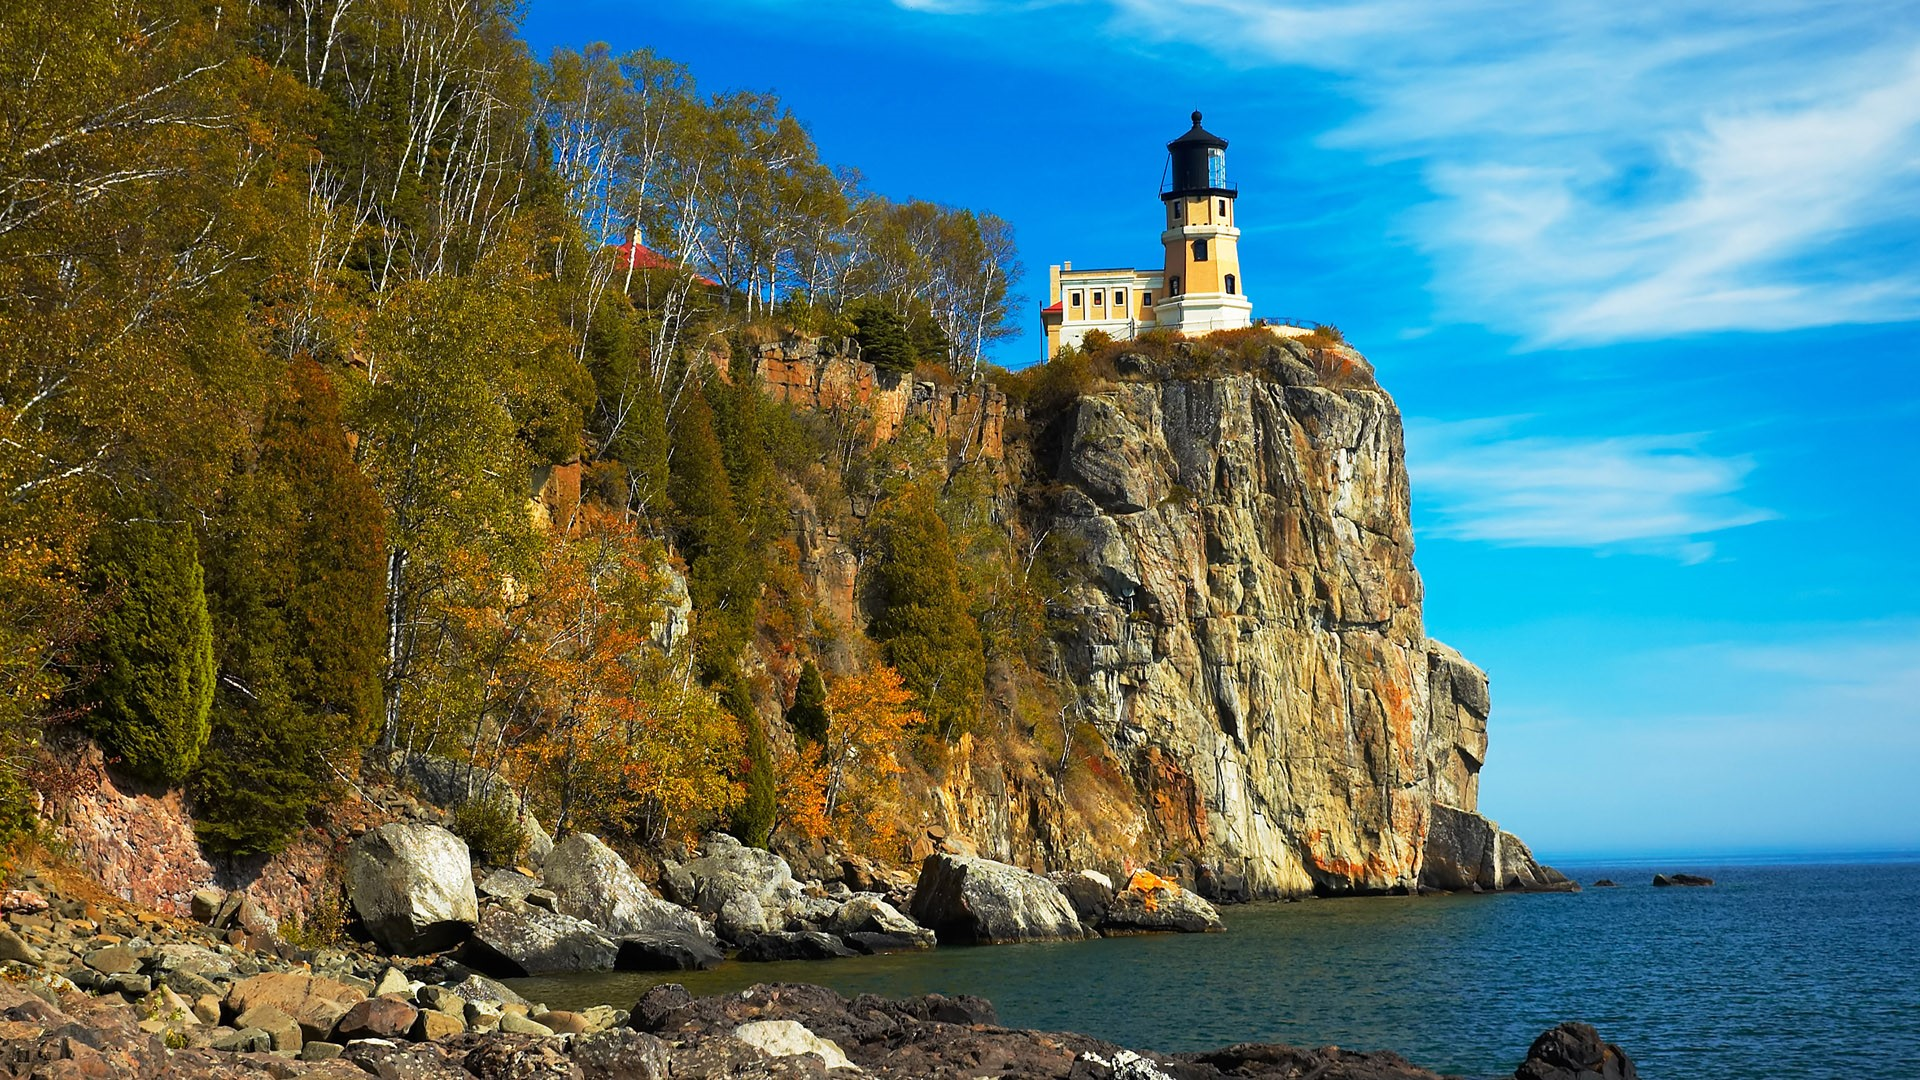

2
Nope its, Minnesota
Full location name: Lake County, Minnesota



Your score: 2/3


In [12]:
game_start(3)